In [1]:
'''Author: Alark Patel'''

'Author: Alark Patel'



# Twitter Analysis


* DISCLAIMER: This project is not designed with any bias in mind. Note that I could have picked either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. My analysis is objective, independent of any political bias you may have. It is my responsiblity to do independent analysis of the data as I try to understand.


In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json
pd.set_option('max_colwidth', 280)
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re #regex

### PART  1 Loading Datasets


In [3]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [4]:
dest_path = '2017-2018.json'
trump_tweets = load_tweets(dest_path)
#assert 2000 <= len(trump_tweets) <= 4000 
#checking if the data is loaded or not. 


### Task 1.1


In [5]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 8
p_s = pd.Series([i['created_at'] for i in trump_tweets])
d_t = pd.to_datetime(p_s)
oldest_month = d_t.min().month
print(oldest_month)

10


## PART 2  - Twitter Source Analysis



* Some data cleaning inorder to do Analysis 

In [6]:

old_path = '2016-2017.json'
old_trump_tweets = load_tweets(old_path)
old_trump_tweets = pd.DataFrame(old_trump_tweets)
trump_tweets = pd.DataFrame(trump_tweets)
df_ = old_trump_tweets[['id', 'created_at', 'source','text', 'retweet_count']]
df1 = trump_tweets[['id', 'created_at', 'source', 'full_text', 'retweet_count']]
df1 = df1.rename(columns={'full_text': 'text'})
df_.loc[:,'id'] = df_['id'].astype('int64')
df1.loc[:,'id'] = df1['id'].astype('int64')
df_ = df_.set_index('id')
df1 = df1.set_index('id')
all_tweets = pd.concat([df_, df1])
#print(all_tweets.size)
#dup = df_.drop_duplicates()
#dup.sort_index()
#assert(all_tweets.size == 40176) 


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Task 2.2


- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 


In [7]:
df_trump = pd.DataFrame(all_tweets, columns=['created_at', 'source', 'text', 'retweet_count']);
df_trump = df_trump.rename(columns={'created_at': 'time'});

## Task 2.3

* Using regular expression cleaning the data, for example removing html tags

In [8]:
df_trump['source'] = df_trump['source'].str.replace(r'<[^>]*>',' ')

### The most common device types used in accessing twitter

### Task 2.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone.

In [9]:
df_trump['time'][0:3]

id
947824196909961216    Mon Jan 01 13:37:52 +0000 2018
947810806430826496    Mon Jan 01 12:44:40 +0000 2018
947802588174577664    Mon Jan 01 12:12:00 +0000 2018
Name: time, dtype: object

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [10]:
df_trump['est_time'] = (
    pd.to_datetime(df_trump['time']).dt.tz_convert("UTC") # converting it UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
947824196909961216,Mon Jan 01 13:37:52 +0000 2018,Twitter for iPhone,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",8237,2018-01-01 08:37:52-05:00
947810806430826496,Mon Jan 01 12:44:40 +0000 2018,Twitter for iPhone,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",14595,2018-01-01 07:44:40-05:00
947802588174577664,Mon Jan 01 12:12:00 +0000 2018,Twitter for iPhone,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",49566,2018-01-01 07:12:00-05:00
947614110082043904,Sun Dec 31 23:43:04 +0000 2017,Twitter for iPhone,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",35164,2017-12-31 18:43:04-05:00
947592785519173637,Sun Dec 31 22:18:20 +0000 2017,Twitter for iPhone,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",39428,2017-12-31 17:18:20-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


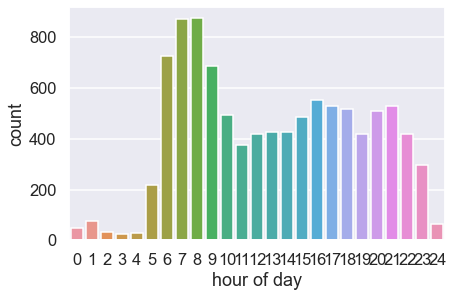

In [11]:
df_trump['hour'] = df_trump.est_time.apply(lambda x: x.hour + x.minute/60 + x.second/3600)
df_trump['roundhour']=round(df_trump['hour'])
plot = sns.countplot(df_trump['roundhour'].astype(int))
plot.set_xlabel('hour of day')
df_trump['hour'] = ((df_trump['est_time'].dt.hour)+ (df_trump['est_time'].dt.minute/60) + (df_trump['est_time'].dt.second/(3600)))

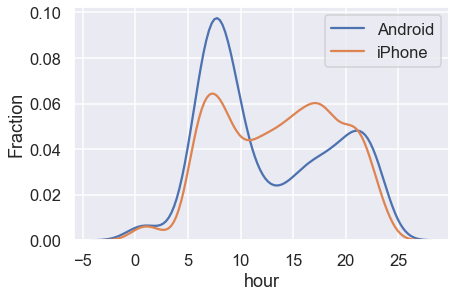

In [12]:
android = df_trump[df_trump['source'] == 'Twitter for Android']
iphone = df_trump[df_trump['source'] == 'Twitter for iPhone']
plot1 = sns.distplot(android['hour'], hist=False, label="Android")
plot2 = sns.distplot(iphone['hour'], hist=False, label="iPhone")
plot1.set_ylabel('Fraction')
plt.xticks([-5,0,5,10,15,20,25])
plt.legend()
plt.show()

### Task 2.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

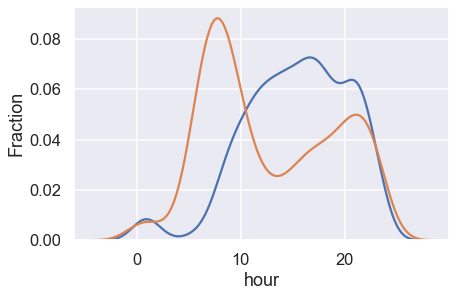

In [13]:
df_trump['time'] = pd.to_datetime(df_trump['time'])
df_trump['year_only'] = df_trump['time'].dt.year
iphone_ = df_trump[(df_trump['source'] == 'Twitter for iPhone') & (df_trump['year_only'] == 2016)]
android_ = df_trump[(df_trump['source'] == 'Twitter for Android') & (df_trump['year_only'] == 2016)]
plot3 = sns.distplot(iphone_['hour'], hist= False)
plot4 = sns.distplot(android_['hour'], hist= False)
plt.ylabel('Fraction')
plt.xticks([0,10,20])
plt.show()


In [14]:
# Obeservations :
question = '''Here we will see what time of the day Mr Trump does the tweets and what time of the day his staff does the tweets from him. '''
ans = '''Based on the obersvation, trump does tweets before afternoon mostly in the morning and his staff do afternoon-evening.
To conclude, Mr Trump not strictly Tweets before universal office hours 9am-5pm and his staff does it during that time.'''
print(question)
print(ans)

Here we will see what time of the day Mr Trump does the tweets and what time of the day his staff does the tweets from him. 
Based on the obersvation, trump does tweets before afternoon mostly in the morning and his staff do afternoon-evening.
To conclude, Mr Trump not strictly Tweets before universal office hours 9am-5pm and his staff does it during that time.


### Task 2.6 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.


In [15]:
iphone1 = df_trump[df_trump['source'] == 'Twitter for iPhone'] 
android1 = df_trump[df_trump['source'] == 'Twitter for Android']
plt.figure(figsize=(15,15))
plot6 = sns.distplot(iphone1['year'], label= 'Android')
plot5 = sns.distplot(android1['year'], label= 'iPhone')
plt.yticks([0.00,0.25,0.50,0.75,1.00,1.25,1.50])
plt.xticks([2016,2017,2018,2019])
plt.legend()
plt.show()

KeyError: 'year'

<Figure size 1080x1080 with 0 Axes>

## PART 3 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [ ]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

### Task 3.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [ ]:
v_read = open('vader_lexicon.txt').readlines()
s = [[i.split('\t')[0],float(i.split('\t')[1])] for i in v_read]
dfv = pd.DataFrame(s, columns=['token','polarity'])
df_sent = dfv.set_index('token');

### Task 3.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [ ]:
df_trump['text'] = df_trump['text'].str.lower()

### Task 3.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [16]:
punct_re = r'[^\w\s\\n]'
df_trump['no_punc'] = df_trump['text'].str.replace(punct_re, ' ')

In [17]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


AssertionError: 

### Task 3.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.



As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

In [18]:
tidy_format = df_trump['no_punc'].str.split(expand=True).stack().reset_index(level=1)
tidy_format.columns = ['num', 'word']

In [19]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

AssertionError: 

### Task 3.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

In [20]:
df_trump['polarity'] = tidy_format.merge(df_sent,how='left', left_on='word',  right_index=True).groupby(lambda y:y).sum()['polarity']
#df_trump['polarity'].replace(np.float64('nan'), 0, inplace= True)

NameError: name 'df_sent' is not defined

In [21]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


KeyError: 'polarity'

### Task 3.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [ ]:
print('Most negative tweets:')
for tweet in df_trump.sort_values('polarity', ascending=True).head()['text']:
    print('\n ', tweet)

In [ ]:
print('Most positive tweets:')
for tweet in df_trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n ', tweet)

### Task 3.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

In [ ]:
nyt = df_trump[df_trump['text'].str.contains('nyt')]
fox = df_trump[df_trump['text'].str.contains('fox')]
plot7 = sns.distplot(nyt['polarity'], label = 'nyt')
plot8 = sns.distplot(fox['polarity'], label = 'fox')
plt.legend()
plt.show()
#Here after observation you can say if trumps like nyt or fox the most..........

## PART 4  Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


### Task 4.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [ ]:

top_20 = (tidy_format.groupby('word').filter(lambda l: len(l) >= 25).merge(df_trump, how='inner', right_index=True, left_index=True)
          .groupby('word').agg({'retweet_count': 'mean'}).sort_values(by='retweet_count', ascending=False))
top_20 = top_20.iloc[0:20,:]

### Task 4.2
Visualize the Results

In [ ]:
top_20['retweet_count'].sort_values().plot(kind='barh', figsize=(15,15))

In [ ]:
#Note: The notebook was created for CS-439 Class at Rutgers University